**This is the code to produce a sample set for and train a neural network.**
All python source code is in the neural.py file

In [1]:
%pylab inline
from Chempy.parameter import ModelParameters
a = ModelParameters()

Populating the interactive namespace from numpy and matplotlib


In [2]:
# First create the training dataset
from Chempy.neural import training_data
# %timeit -r 1 -n 1

The above was run on a faster machine, taking 2 hours, 26 minutes and 28 seconds to calculate a training dataset of length 15625. This is stored in the 'Neural/' folder


In [3]:
# Now create the datasets for model verification (i.e. hyperparameter constraints)
# and for final testing

from Chempy.neural import verification_and_testing
# %timeit -r 1 -n 1

This was again run on a faster PC. The runtime was 19 minutes and 10 seconds, producing the verif_param_grid, verif_abundances, test_param_grid, test_abundances npy data files

Training epoch 0 of 1000 complete
Training epoch 100 of 1000 complete
Training epoch 200 of 1000 complete
Training epoch 300 of 1000 complete
Training epoch 400 of 1000 complete
Training epoch 500 of 1000 complete
Training epoch 600 of 1000 complete
Training epoch 700 of 1000 complete
Training epoch 800 of 1000 complete
Training epoch 900 of 1000 complete


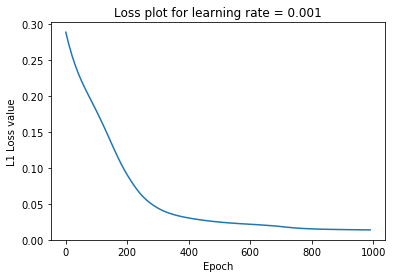

In [4]:
# Now create and train the neural network
from Chempy.neural import create_network
epoch, loss = create_network()

In [ ]:
# Create the corner plot
from Chempy.neural import neural_corner_plot, neural_errors
param_error = neural_errors('verif')
print(np.median(param_error))
neural_corner_plot()

In [ ]:
# Load verification dataset
verif_param = np.load('Neural/verif_param_grid.npy')
verif_abundances = np.load('Neural/verif_abundances.npy')

# Calculate average percentage error in sample per element
from Chempy.neural import neural_output
error = []

for i in range(a.verif_test_sizes[0]):
    predicted_abundances = neural_output(verif_param[i])
    # Compute percentage error for each element
    error.append(np.absolute(predicted_abundances-verif_abundances[i]))
element_error = np.mean(error,axis=0)
print(np.max(element_error))

In [ ]:
verif_param = np.load('Neural/verif_param_grid.npy')
verif_abundances = np.load('Neural/verif_abundances.npy')
verif_abundances.shape

In [ ]:
# Prepare plot
fig = plt.figure(figsize=(30.69,8.27), dpi=100)
plt.clf()
text_size = 15
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.)
plt.rc('lines', linewidth = 1.)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,'font.size' : 16,'font.family' : 'libertine','text.latex.unicode': True}
ax = fig.add_subplot(111)
abundance_names = []
proto_sun = np.load('Chempy/input/stars/Proto-sun.npy')
for item in proto_sun.dtype.names[:-1]:
    if item != 'Fe':
        abundance_names.append('[%s/Fe]' %(item))
    else:
        abundance_names.append('[Fe/H]')
plt.xticks(np.arange(len(a.element_names)),abundance_names)

plt.plot(predicted_abundances,'r',label='Neural')
plt.plot(verif_abundances[1],'g',label='Chempy')
plt.legend()
plt.ylabel("Abundances relative to solar in dex")
plt.xlabel("Element")
plt.title("Abundance plot")
savefig('Neural/test')

## Create corner plot for data

In [ ]:
# Load verification dataset
verif_param = np.load('Neural/verif_param_grid.npy')
verif_abundances = np.load('Neural/verif_abundances.npy')

# Calculate average percentage error in sample per element
from Chempy.neural import neural_output
error = []

for i in range(len(verif_param)):
    predicted_abundances = neural_output(verif_param[i])
    # Compute percentage error for each element
    error.append(np.absolute(predicted_abundances-verif_abundances[i]))

# This contains absolute median error for each parameter set
param_error = np.median(error,axis=1)

In [ ]:
a.verif_test_sizes[0]

In [ ]:
plt.clf()
plt.rc('axes', labelsize=16, lw=0.3)
plt.rc('text',usetex=True)

# Create plot

data_tr = np.load('Neural/training_param_grid.npy')
data_v = np.load('Neural/verif_param_grid.npy')
error = param_error

# Use only 2 axes now
x_tr = [item[0] for item in data_tr]
y_tr = [item[3] for item in data_tr]
x_v = [item[0] for item in data_v]
y_v = [item[3] for item in data_v]

fig = plt.figure()
ax = fig.add_subplot(111)
P1 = ax.scatter(x_tr,y_tr,c='k',marker='+',s=120)
ax = plt.gca()
# Store axis limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()
P2 = ax.scatter(x_v,y_v,marker='o',alpha=0.3,
                c=error,s=1,cmap='plasma')
# Replot this on top
P1 = ax.scatter(x_tr,y_tr,c='k',marker='+',alpha=1,s=120)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
fig.colorbar(P2,orientation='horizontal')
plt.show()

**NOTES / TO DO (see other file also)**
- *Change the diagonal to be correct histogram of data - DONE*
- *Color histogram by mean error in that bar - DONE*
- *Add other params - DONE*
- *Sort axis names - DONE*
- SORT axis sizes (see plot_mcmc.py)
- Vectorize neural output calculation
- Add support for corner plot to take either dataset